# SI 618 Final Project Notebook

## Project Description

Our team is interested in understanding hotel booking trends to provide business insights for management and stakeholder groups.

Primary Question:
How can we use the hotel bookings data to improve business operations through prediction of guest cancellation?

Our goal is to inform hotel management, stakeholders, tourism sector the following:
* Data driven customer segmentation / clusters
    * Top Customer Profiles
    * Demographic Information
    * Positioning for Key Performance amongst customers
* Booking cancellation trends amongst hotel guests
    * Cancellation prediction based on historical data
    * Human interpretability around cancellation classification
    * Define potential strategic goals based on operational objectives (e.g., Accuracy, Precision, Sensitivity / Recall, Specificity)


# Table Of Contents
1. Python Set Up
2. Change Global Panda Settings
3. Load Inspect Clean and Transform Data
    * 3.1 Hotel Bookings Data - Prediction Modeling Data
    * 3.2 Country Shape File Data - Plotting Data
    * 3.3 Hotel Bookings Data - Inference Modeling Data (Logistic Regression)
    * 3.4 Hotel Bookings Data - Inference Modeling Data (Decision Tree)
    * 3.5 Hotel Bookings Data - Inference Modeling Data (Clustering)
4. Inferential Statistics
    * 4.1 Logistic Regression
    * 4.2 Decision Tree
    * 4.3 Clustering
5. Prediction Analytics
    * 5.1 Scale the Data
    * 5.2 Train Test Split
    * 5.3 Build Classification Models
        * 5.3.1 Logistic Regression
        * 5.3.2 KNN
        * 5.3.3 Random Forrest
    * 5.4 Predict on Test Data Analyze Results
        * 5.4.1 Logistic Regression
        * 5.4.2 KNN
        * 5.4.3 Random Forrest

# (1) Python Set Up

#### Import and load libraries

In [1493]:
# Load in libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# (2) Change Global Pandas Settings

In [1494]:
pd.set_option('display.max_columns', None)

# (3) Load Inspect Clean and Transform Data

#### Load, Inspect and Clean Objectives
* Transform existing data into bucketed data, if necessary, to add features to the prediction modeling
* Normalizing numerical data using log transformations and or other kinds of numerical transformations
* Handle missing data by either:
    * Removing missing observations
    * Imputing missing observations with the median value (if numerical)
    * Imputing missing observations with the mode or random sample of distribution of categories (if categorical)

#### Load in the data

In [1495]:
# Load in the hotel bookings data set

# Change this path to where you have the hotel bookings data set
hotel_bookings = pd.read_csv('data/hotel_bookings.csv')

# Create a copy of the original data to use later
hotel_bookings_shape = hotel_bookings.copy()

# Create a copy of the original data to use later
hotel_bookings_inference_lr = hotel_bookings.copy()

hotel_bookings_inference_dt = hotel_bookings.copy()

hotel_bookings_inference_cluster = hotel_bookings.copy()

# reead in shape file data for world map
world_shape_df = gpd.read_file('data/world-administrative-boundaries/world-administrative-boundaries.shp')

## (3.1) Hotel Bookings Data

#### Look at the first few rows of the data

In [1496]:
# Look at the first few rows of the data set
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Look at the data types of the differnet features in the data set

In [1497]:
# Look at the data types of each column
hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#### Convert some of the features to the appropriate data types

In [1498]:
# convert columns to the appropritat data types given the type of data it is
# more specifically turn  the following columns into categorical data types
# arrival_date_year, arrival_date_week_number, agent, company, arrival_date_day_of_month
hotel_bookings['arrival_date_year'] = hotel_bookings['arrival_date_year'].astype('object')
hotel_bookings['agent'] = hotel_bookings['agent'].astype('object')
hotel_bookings['company'] = hotel_bookings['company'].astype('object')

#### Re-inspect the data types of the differnet features in the data set

In [1499]:
# Look at the data types of each column
hotel_bookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#### Look at the shape of the data set

In [1500]:
# Look at the number of rows and columns in the data set
hotel_bookings.shape

(119390, 32)

#### Look at the number of unique values for each feature of the data set

In [1501]:
# check the unique values of each column
hotel_bookings.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [1502]:
# look at the actual unique values of each column
for i in hotel_bookings.columns:
    print(i)
    print(hotel_bookings[i].unique())
    print('\n')

hotel
['Resort Hotel' 'City Hotel']


is_canceled
[0 1]


lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235

#### Inspect the number of null values for each feature of the data set

In [1503]:
# check for missing values in each column
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Handle the missing data

In [1504]:
# Drop the missing values in the children column
hotel_bookings = hotel_bookings[~hotel_bookings['children'].isnull()].reset_index(drop=True)

# drop the missing values in the country column
hotel_bookings = hotel_bookings[~hotel_bookings['country'].isnull()].reset_index(drop=True)


#### Inspect the distributions of each of the numerical and categorical features

In [1505]:
# look at the distribution of numerical columns
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [1506]:
# look at the distribution of categorical columns
hotel_bookings.describe(include='object')

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,102894.0,6623.0,118898,118898,118898
unique,2,3,12,5,177,7,5,10,12,3,332.0,349.0,4,3,926
top,City Hotel,2016,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9.0,40.0,Transient,Check-Out,2015-10-21
freq,79302,56435,13852,91863,48586,56402,97730,85601,73863,104163,31959.0,927.0,89174,74745,1461


#### Plot the numerical features to visually inspect the distributions

In [1507]:
# use subplots to plot the distribution of each of the numerical columns in a histogram
# this will allow us to see the distribution of each column in one plot
# fig, ax = plt.subplots(3, 4, figsize=(30, 20))

# create a list of the numerical columns
# num_cols = hotel_bookings.select_dtypes(include='number').columns

# create a counter to keep track of the row and column we are on
# row = 0
# col = 0

# loop through each of the numerical columns
# for i in num_cols:
    # plot the histogram of the column
#     ax[row, col].hist(hotel_bookings[i], bins=20)
    # set the title of the plot to the name of the column
#     ax[row, col].set_title(i)
    # increase the column counter by 1
#     col += 1
    # if the column counter is equal to 3
#     if col == 4:
        # reset the column counter to 0
#         col = 0
        # increase the row counter by 1
#         row += 1

# show the plots
# plt.show()

#### Drop the features that are not needed for the analysis

In [1508]:
# drop columns in dataset
# drop the following columns because they are not useful for our analysis
# agent, company arrival_date_year reservation_status_date reservation_status, assigned_room_type

# drop the agent column
hotel_bookings.drop('agent', axis=1, inplace=True)

# drop the company column
hotel_bookings.drop('company', axis=1, inplace=True)

# drop the arrival_date_year column
hotel_bookings.drop('arrival_date_year', axis=1, inplace=True)

# drop the reservation_status_date column
hotel_bookings.drop('reservation_status_date', axis=1, inplace=True)

# drop the reservation_status column
hotel_bookings.drop('reservation_status', axis=1, inplace=True)

# drop the assigned_room_type column
hotel_bookings.drop('assigned_room_type', axis=1, inplace=True)


#### Convert the categorical features to dummy variables

In [1509]:
hotel_type = pd.get_dummies(hotel_bookings['hotel'], drop_first=True, dtype=int)

hotel_arrival_date_month = pd.get_dummies(hotel_bookings['arrival_date_month'], drop_first=True, dtype=int)

hotel_meal = pd.get_dummies(hotel_bookings['meal'], drop_first=True, dtype=int)

hotel_country = pd.get_dummies(hotel_bookings['country'], drop_first=True, dtype=int)

hotel_market_segment = pd.get_dummies(hotel_bookings['market_segment'], drop_first=True, dtype=int)

hotel_distribution_channel = pd.get_dummies(hotel_bookings['distribution_channel'], drop_first=True, dtype=int)

hotel_reserved_room_type = pd.get_dummies(hotel_bookings['reserved_room_type'], drop_first=True, dtype=int)

hotel_deposit_type = pd.get_dummies(hotel_bookings['deposit_type'], drop_first=True, dtype=int)

hotel_customer_type = pd.get_dummies(hotel_bookings['customer_type'], drop_first=True, dtype=int)

#### Column bind the dummy variables to the original data set

In [1510]:
# column bind dummy variables to original data set
hotel_bookings = pd.concat([
    hotel_bookings,
    hotel_type,
    hotel_arrival_date_month,
    hotel_meal,
    hotel_country,
    hotel_market_segment,
    hotel_distribution_channel,
    hotel_reserved_room_type,
    hotel_deposit_type,
    hotel_customer_type
], axis=1)

#### Drop the original categorical features from the data set that have been converted to dummy variables

In [1511]:
# drop original columns that have been converted to dummy variables from the hotel_books data set
hotel_bookings.drop([
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'deposit_type',
    'customer_type'
], axis=1, inplace=True)


## (3.2) Country Shape File Data

#### Shape File Data Cleaning and preparation

In [1512]:
# Check to see if there are any country codes in hotel_bookings that are not in the world_shape_df

# Array of country codes in hotel_bookings
hotel_countries = hotel_bookings_shape["country"]

# Array of country codes in world_shape_df
world_countries = world_shape_df["iso3"]

# create a new array of country codes that are in hotel_countries but not in world_countries
remove_me = hotel_countries[~hotel_countries.isin(world_countries)].unique()

In [1513]:
# remove all observations that are from a country in the remove_me array from hotel_bookings_copy
hotel_bookings_shape = hotel_bookings_shape[~hotel_bookings_shape['country'].isin(remove_me)].reset_index(drop=True)

In [1514]:
# remove the "Azores Islands" observation from the world shape file data set
world_shape_df = world_shape_df[world_shape_df["name"] != "Azores Islands"]

#### Clean the join column country in the shape data set

In [1515]:
# Rename the country column in the hotel_bookings_copy data set to iso3 to match the key of the world_shape_df data set
hotel_bookings_shape.rename(columns={'country': 'iso3'}, inplace=True)

#### Merge Hotel Bookings Data with Shape Data on iso3

In [1516]:
merged_df = pd.merge(hotel_bookings_shape, world_shape_df, on='iso3', how='left')

#### Double check that the merged data set is the same number of observations as the original hotel bookings data set

In [1517]:
hotel_bookings_shape.shape

(117604, 32)

In [1518]:
merged_df.shape

(117604, 40)

#### Average Cancelation Rate By Country Heat Map

In [1519]:
# Group the data by country and calculate cancellation rate
country_cancellation_rate = merged_df.groupby('iso3')['is_canceled'].mean().reset_index()

# merge back in the world_shape_df data set
country_cancellation_rate = pd.merge(country_cancellation_rate, world_shape_df, on='iso3', how='left')

# drop columns from the data set
country_cancellation_rate.drop(['status', 'color_code', 'name', 'continent', 'region', 'iso_3166_1_', 'french_shor'], axis=1, inplace=True)

# convert country_cancellation_rate to a geopandas data frame
country_cancellation_rate = gpd.GeoDataFrame(country_cancellation_rate)


#### Create Plot

([], [])

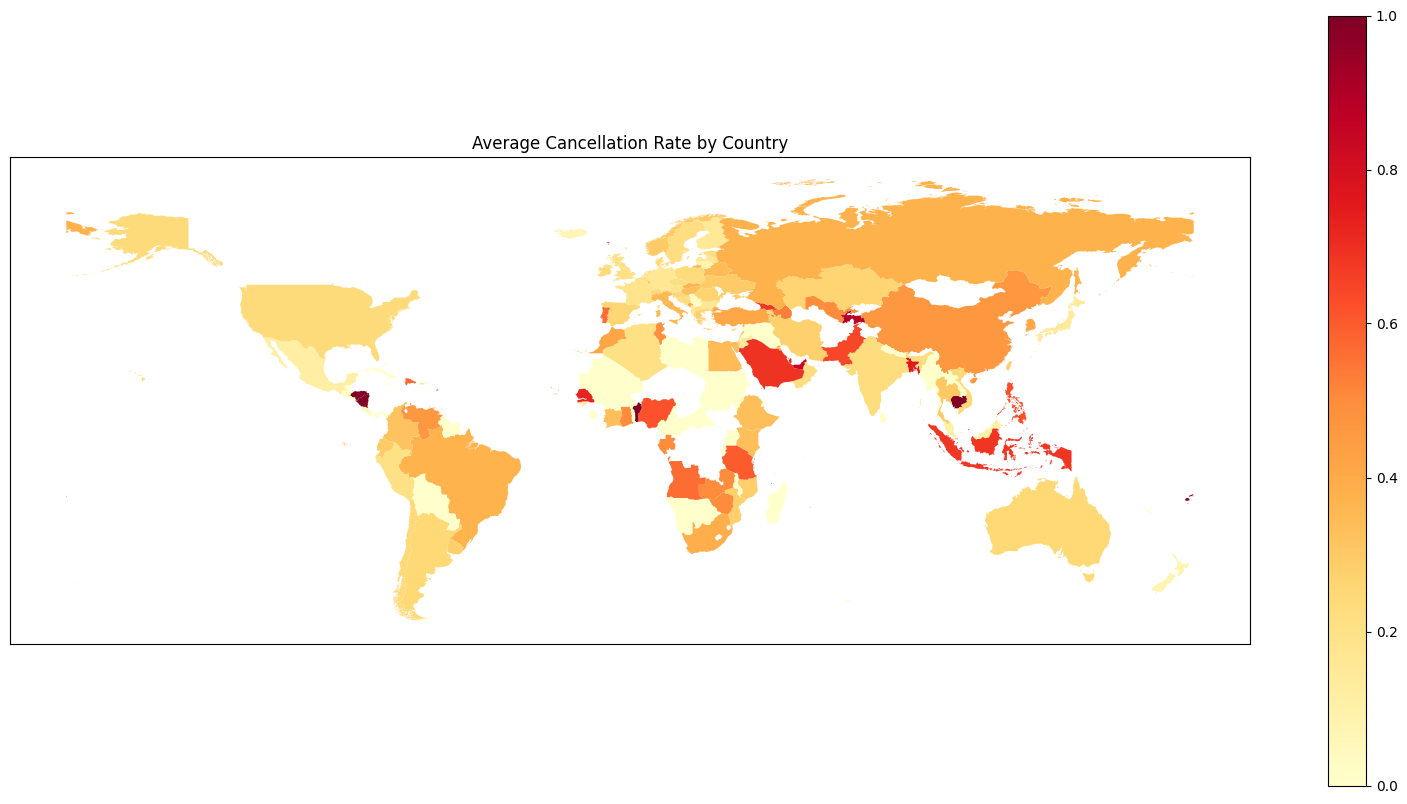

In [1520]:
# change the figure size of the plot
fig, ax = plt.subplots(figsize=(20, 10))
country_cancellation_rate.plot(column='is_canceled', cmap='YlOrRd', ax=ax, legend=True)
plt.title('Average Cancellation Rate by Country')
plt.xticks([])
plt.yticks([])

#### Number of Bookings By Country Heat Map

In [1521]:
# Group the data by country and count how many observations there are for each country
country_count = merged_df.groupby('iso3')['is_canceled'].count().reset_index()

# merge back in the world_shape_df data set
country_count = pd.merge(country_count, world_shape_df, on='iso3', how='left')

# drop columns from the data set
country_count.drop(['status', 'color_code', 'name', 'continent', 'region', 'iso_3166_1_', 'french_shor'], axis=1, inplace=True)

# convert country_count to a geopandas data frame
country_count = gpd.GeoDataFrame(country_count)

#### Create Plot

([], [])

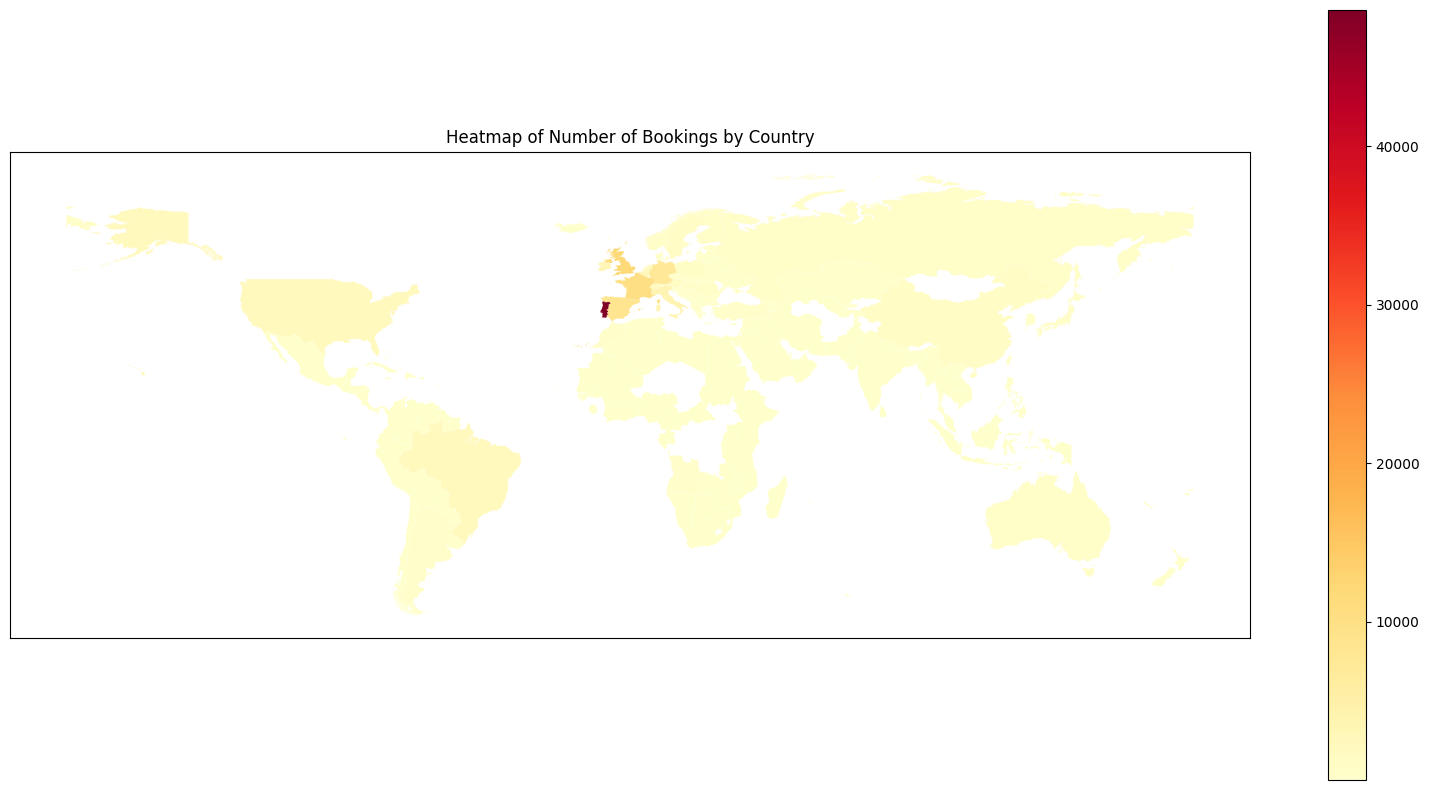

In [1522]:
fig, ax = plt.subplots(figsize=(20, 10))
country_count.plot(column='is_canceled', cmap='YlOrRd', ax=ax, legend=True)
plt.title('Heatmap of Number of Bookings by Country')
plt.xticks([])
plt.yticks([])

#### Average Lead Time By Country Heat Map

In [1523]:
# group the data bby country and calculate the average lead time
country_lead_time = merged_df.groupby('iso3')['lead_time'].mean().reset_index()

# merge back in the world_shape_df data set
country_lead_time = pd.merge(country_lead_time, world_shape_df, on='iso3', how='left')

# drop columns from the data set
country_lead_time.drop(['status', 'color_code', 'name', 'continent', 'region', 'iso_3166_1_', 'french_shor'], axis=1, inplace=True)

# convert country_lead_time to a geopandas data frame
country_lead_time = gpd.GeoDataFrame(country_lead_time)

#### Create Plot

([], [])

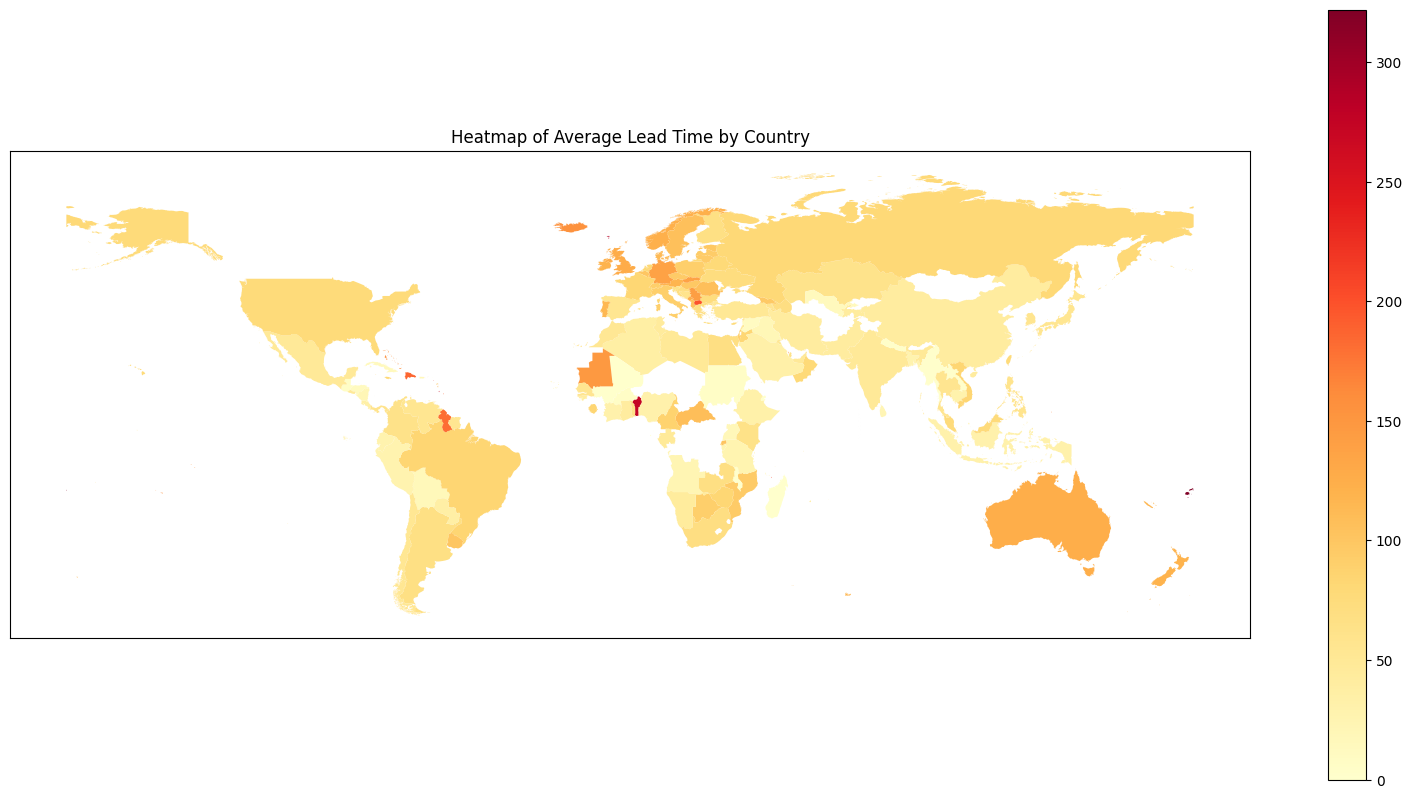

In [1524]:
fig, ax = plt.subplots(figsize=(20, 10))
country_lead_time.plot(column='lead_time', cmap='YlOrRd', ax=ax, legend=True)
plt.title('Heatmap of Average Lead Time by Country')
plt.xticks([])
plt.yticks([])

## (3.3) Hotel Bookings Data - Inference Modeling Data (Logistic Regression)

In [1525]:
# one hot encode categorical variables
hotel_bookings_inference_lr.drop([
    'country',
    'assigned_room_type',
    'agent',
    'company',
    'arrival_date_year',
    'reservation_status_date',
    'reservation_status',
    'arrival_date_month',
    "arrival_date_day_of_month",
    "distribution_channel",
    "market_segment",
    "required_car_parking_spaces",
    "babies",
    "reserved_room_type"
],
axis=1, inplace=True)

hotel_bookings_inference_lr = pd.get_dummies(hotel_bookings_inference_lr, drop_first=True, dtype=int)

# remove missing data in children column
hotel_bookings_inference_lr = hotel_bookings_inference_lr[~hotel_bookings_inference_lr['children'].isnull()].reset_index(drop=True)

In [1526]:
#x = hotel_bookings_inference_lr.corr()

# write x as a csv to disk
#x.to_csv('data/correlation.csv')

In [1527]:
hotel_bookings_inference_lr.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,0,0,2,0.0,0,0,0,3,0,0.0,0,1,0,0,0,0,0,0,0,1,0
1,0,737,27,0,0,2,0.0,0,0,0,4,0,0.0,0,1,0,0,0,0,0,0,0,1,0
2,0,7,27,0,1,1,0.0,0,0,0,0,0,75.0,0,1,0,0,0,0,0,0,0,1,0
3,0,13,27,0,1,1,0.0,0,0,0,0,0,75.0,0,1,0,0,0,0,0,0,0,1,0
4,0,14,27,0,2,2,0.0,0,0,0,0,0,98.0,1,1,0,0,0,0,0,0,0,1,0


In [1528]:
hotel_bookings_inference_lr.shape

(119386, 24)

## (3.4) Hotel Bookings Data - Inference Modeling Data (Decision Tree)

In [1529]:
hotel_bookings_inference_dt.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Drop the features that are not needed for the analysis

In [1530]:
hotel_bookings_inference_dt.drop([
    'country',
    'assigned_room_type',
    'agent',
    'company',
    'arrival_date_year',
    'reservation_status_date',
    'reservation_status',
    'arrival_date_month',
    "arrival_date_day_of_month",
    "customer_type",
    "distribution_channel",
    "required_car_parking_spaces",
    "market_segment",
    "adr",
    "previous_bookings_not_canceled",
    "meal"
],
axis=1, inplace=True)

In [1531]:
hotel_bookings_inference_dt.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,total_of_special_requests
0,Resort Hotel,0,342,27,0,0,2,0.0,0,0,0,C,3,No Deposit,0,0
1,Resort Hotel,0,737,27,0,0,2,0.0,0,0,0,C,4,No Deposit,0,0
2,Resort Hotel,0,7,27,0,1,1,0.0,0,0,0,A,0,No Deposit,0,0
3,Resort Hotel,0,13,27,0,1,1,0.0,0,0,0,A,0,No Deposit,0,0
4,Resort Hotel,0,14,27,0,2,2,0.0,0,0,0,A,0,No Deposit,0,1


#### One hot encode the categorical features

In [1532]:
# one hot encode categorical variables
hotel_bookings_inference_dt = pd.get_dummies(hotel_bookings_inference_dt, drop_first=True, dtype=int)

In [1533]:
hotel_bookings_inference_dt.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,booking_changes,days_in_waiting_list,total_of_special_requests,hotel_Resort Hotel,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,27,0,0,2,0.0,0,0,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,737,27,0,0,2,0.0,0,0,0,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,7,27,0,1,1,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,13,27,0,1,1,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,14,27,0,2,2,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


## (3.5) Hotel Bookings Data - Inference Modeling Data (Clustering)

# (4) Inferential Statistics

## (4.1) Logistic Regression

In [1534]:
y = hotel_bookings_inference_lr['is_canceled']

X = hotel_bookings_inference_lr.drop('is_canceled', axis=1)

In [1535]:
random.seed(23)
model_lr_inference = sm.Logit(y, X).fit(maxiter=100)

Optimization terminated successfully.
         Current function value: 0.474445
         Iterations 9


In [1536]:
print(model_lr_inference.summary())

                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119386
Model:                          Logit   Df Residuals:                   119363
Method:                           MLE   Df Model:                           22
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                  0.2802
Time:                        15:14:36   Log-Likelihood:                -56642.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.0041   8.72e-05     47.414      0.000       0.004       0.004
arrival_date_week_number          -0.0114      0.001    -21.059      0.

## (4.2) Decision Tree

In [1537]:
random.seed(23)
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=6, max_leaf_nodes=7, min_samples_split=1000)
tree_model = tree_model.fit(hotel_bookings_inference_dt.drop('is_canceled', axis=1), hotel_bookings_inference_dt['is_canceled'])

[Text(0.7142857142857143, 0.9285714285714286, 'deposit_type_Non Refund <= 0.5\nentropy = 0.951\nsamples = 119390\nvalue = [75166, 44224]\nclass = Not Canceled'),
 Text(0.5714285714285714, 0.7857142857142857, 'lead_time <= 8.5\nentropy = 0.86\nsamples = 104803\nvalue = [75073, 29730]\nclass = Not Canceled'),
 Text(0.42857142857142855, 0.6428571428571429, 'entropy = 0.458\nsamples = 20741\nvalue = [18741, 2000]\nclass = Not Canceled'),
 Text(0.7142857142857143, 0.6428571428571429, 'previous_cancellations <= 0.5\nentropy = 0.915\nsamples = 84062\nvalue = [56332, 27730]\nclass = Not Canceled'),
 Text(0.5714285714285714, 0.5, 'total_of_special_requests <= 0.5\nentropy = 0.896\nsamples = 81748\nvalue = [56174, 25574]\nclass = Not Canceled'),
 Text(0.42857142857142855, 0.35714285714285715, 'booking_changes <= 0.5\nentropy = 0.96\nsamples = 41786\nvalue = [25800, 15986]\nclass = Not Canceled'),
 Text(0.2857142857142857, 0.21428571428571427, 'children <= 0.5\nentropy = 0.985\nsamples = 34184\nv

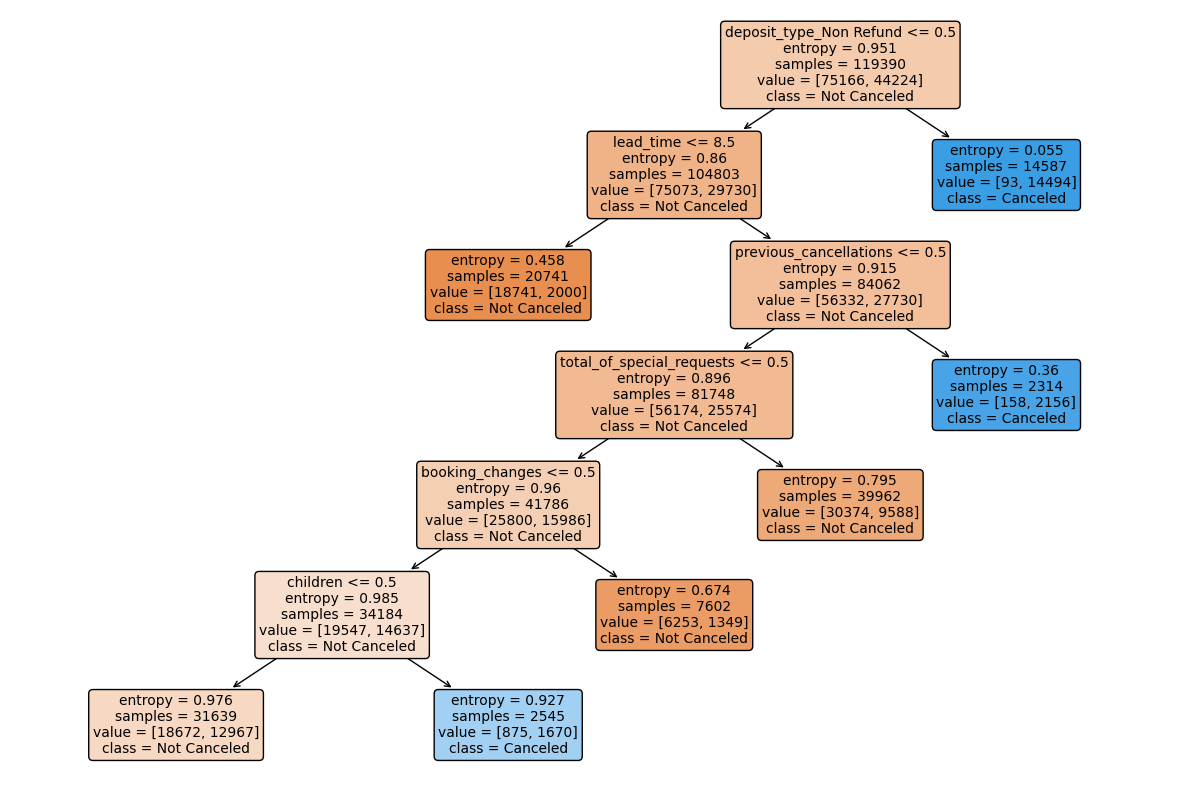

In [1538]:
# change the figure size
plt.figure(figsize=(15, 10))

tree.plot_tree(
    tree_model,
    feature_names = list(hotel_bookings_inference_dt.drop('is_canceled', axis=1).columns),
    class_names = ['Not Canceled', 'Canceled'],
    filled = True,
    rounded = True,
    fontsize = 10
)

## (4.3) K Means CLustering

# (5) Predictive Analytics

## (5.1) Scale The Data

In [ ]:
# Add in scaler
sc = StandardScaler()

# Scale the continuous variables
scaled_cont = sc.fit_transform(
    hotel_bookings[
        ['lead_time',
         'stays_in_weekend_nights',
         'stays_in_week_nights',
         'adults',
         'children',
         'babies',
         'previous_cancellations',
         'previous_bookings_not_canceled',
         'booking_changes',
         'days_in_waiting_list',
         'adr',
         'required_car_parking_spaces',
         'total_of_special_requests']
    ]
)

# Turn scaled continuous variables into a data frame
scaled_cont = pd.DataFrame(
    scaled_cont,
    columns=[
        'lead_time',
        'stays_in_weekend_nights',
        'stays_in_week_nights',
        'adults',
        'children',
        'babies',
        'previous_cancellations',
        'previous_bookings_not_canceled',
        'booking_changes',
        'days_in_waiting_list',
        'adr',
        'required_car_parking_spaces',
        'total_of_special_requests'
    ]
)

# create data frame with just dummy variables
hotel_bookings_dummies =  hotel_bookings.drop([
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
], axis=1)

# column bind the scaled continuous variables and the dummy variables
hotel_bookings_scaled = pd.concat([scaled_cont, hotel_bookings_dummies], axis=1)

# look at the first few rows of the data set
hotel_bookings_scaled.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,Resort Hotel,August,December,February,January,July,June,March,May,November,October,September,FB,HB,SC,Undefined,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,ATF,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BOL,BRA,BRB,BWA,CAF,CHE,CHL,CHN,CIV,CMR,CN,COL,COM,CPV,CRI,CUB,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,ECU,EGY,ESP,EST,ETH,FIN,FJI,FRA,FRO,GAB,GBR,GEO,GGY,GHA,GIB,GLP,GNB,GRC,GTM,GUY,HKG,HND,HRV,HUN,IDN,IMN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JEY,JOR,JPN,KAZ,KEN,KHM,KIR,KNA,KOR,KWT,LAO,LBN,LBY,LCA,LIE,LKA,LTU,LUX,LVA,MAC,MAR,MCO,MDG,MDV,MEX,MKD,MLI,MLT,MMR,MNE,MOZ,MRT,MUS,MWI,MYS,MYT,NAM,NCL,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,PLW,POL,PRI,PRT,PRY,PYF,QAT,ROU,RUS,RWA,SAU,SDN,SEN,SGP,SLE,SLV,SMR,SRB,STP,SUR,SVK,SVN,SWE,SYC,SYR,TGO,THA,TJK,TMP,TUN,TUR,TWN,TZA,UGA,UKR,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Direct,GDS,TA/TO,Undefined,B,C,D,E,F,G,H,L,P,Non Refund,Refundable,Group,Transient,Transient-Party
0,2.223407,-0.932429,-1.316808,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,4.256884,-0.132201,-2.020440,-0.253449,-0.721208,0,27,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,5.918350,-0.932429,-1.316808,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,5.788789,-0.132201,-2.020440,-0.253449,-0.721208,0,27,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.910279,-0.932429,-0.790536,-1.483635,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,-0.534870,-0.253449,-0.721208,0,27,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.854153,-0.932429,-0.790536,-1.483635,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,-0.534870,-0.253449,-0.721208,0,27,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.844799,-0.932429,-0.264264,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,-0.079295,-0.253449,0.540344,0,27,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## (5.2) Train and Test Split

#### Preprocess - Shuffle the data

In [24]:
# shuffle the data to insure that the data is not ordered in any way
random.seed(23)
shuffle = random.sample(list(hotel_bookings_scaled.index), int(hotel_bookings_scaled.shape[0]))

hotel_bookings_shuffled = hotel_bookings_scaled.iloc[shuffle, :]

shuffle = random.sample(list(hotel_bookings_scaled.index), int(hotel_bookings_scaled.shape[0]))

hotel_bookings_shuffled = hotel_bookings_scaled.iloc[shuffle, :]

#### Preprocess - Split the data into test and train

In [25]:
# set the size of the data subset
train_size = 0.8

# randomly sample 80% of the row indices from the hotel bookings data set
# this will be used to subset the data set
train_obs = random.sample(list(hotel_bookings_shuffled.index), int(hotel_bookings_shuffled.shape[0] * train_size))

# Create the training set
training_set = hotel_bookings_shuffled.iloc[train_obs, :]

# Create the testing set
testing_set = hotel_bookings_shuffled.iloc[~hotel_bookings_shuffled.index.isin(train_obs), :]

#### Preprocess - Look at the first few rows of the train and test data

In [26]:
training_set.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,Resort Hotel,August,December,February,January,July,June,March,May,November,October,September,FB,HB,SC,Undefined,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,ATF,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BOL,BRA,BRB,BWA,CAF,CHE,CHL,CHN,CIV,CMR,CN,COL,COM,CPV,CRI,CUB,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,ECU,EGY,ESP,EST,ETH,FIN,FJI,FRA,FRO,GAB,GBR,GEO,GGY,GHA,GIB,GLP,GNB,GRC,GTM,GUY,HKG,HND,HRV,HUN,IDN,IMN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JEY,JOR,JPN,KAZ,KEN,KHM,KIR,KNA,KOR,KWT,LAO,LBN,LBY,LCA,LIE,LKA,LTU,LUX,LVA,MAC,MAR,MCO,MDG,MDV,MEX,MKD,MLI,MLT,MMR,MNE,MOZ,MRT,MUS,MWI,MYS,MYT,NAM,NCL,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,PLW,POL,PRI,PRT,PRY,PYF,QAT,ROU,RUS,RWA,SAU,SDN,SEN,SGP,SLE,SLV,SMR,SRB,STP,SUR,SVK,SVN,SWE,SYC,SYR,TGO,THA,TJK,TMP,TUN,TUR,TWN,TZA,UGA,UKR,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Direct,GDS,TA/TO,Undefined,B,C,D,E,F,G,H,L,P,Non Refund,Refundable,Group,Transient,Transient-Party
48040,-0.676422,-0.932429,-0.264264,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,0.938816,-0.253449,-0.721208,1,13,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
113229,1.362813,-0.932429,0.262007,1.973145,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,0.938816,-0.253449,1.801895,0,23,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
44775,-0.330313,1.075176,-0.790536,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,3.157575,-0.323522,-0.253449,-0.721208,0,44,25,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
67595,0.427384,0.071373,-0.264264,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,0.356473,-0.253449,0.540344,1,19,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16032,0.932515,-0.932429,0.788279,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,0.633779,-0.253449,-0.721208,0,35,26,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [27]:
testing_set.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,Resort Hotel,August,December,February,January,July,June,March,May,November,October,September,FB,HB,SC,Undefined,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,ATF,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BOL,BRA,BRB,BWA,CAF,CHE,CHL,CHN,CIV,CMR,CN,COL,COM,CPV,CRI,CUB,CYM,CYP,CZE,DEU,DJI,DMA,DNK,DOM,DZA,ECU,EGY,ESP,EST,ETH,FIN,FJI,FRA,FRO,GAB,GBR,GEO,GGY,GHA,GIB,GLP,GNB,GRC,GTM,GUY,HKG,HND,HRV,HUN,IDN,IMN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JEY,JOR,JPN,KAZ,KEN,KHM,KIR,KNA,KOR,KWT,LAO,LBN,LBY,LCA,LIE,LKA,LTU,LUX,LVA,MAC,MAR,MCO,MDG,MDV,MEX,MKD,MLI,MLT,MMR,MNE,MOZ,MRT,MUS,MWI,MYS,MYT,NAM,NCL,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,PLW,POL,PRI,PRT,PRY,PYF,QAT,ROU,RUS,RWA,SAU,SDN,SEN,SGP,SLE,SLV,SMR,SRB,STP,SUR,SVK,SVN,SWE,SYC,SYR,TGO,THA,TJK,TMP,TUN,TUR,TWN,TZA,UGA,UKR,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Direct,GDS,TA/TO,Undefined,B,C,D,E,F,G,H,L,P,Non Refund,Refundable,Group,Transient,Transient-Party
111571,2.719184,-0.932429,0.262007,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,0.211283,-0.253449,0.540344,0,20,17,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
91156,-0.798028,-0.932429,-0.264264,-1.483635,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,-0.237756,-0.253449,-0.721208,0,26,22,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
102675,-0.863508,0.071373,-0.790536,-1.483635,-0.261059,-0.081618,-0.103021,-0.088662,1.193076,-0.132201,-0.455639,-0.253449,-0.721208,0,51,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8550,2.606933,-0.932429,0.262007,-1.483635,-0.261059,-0.081618,-0.103021,-0.088662,1.193076,-0.132201,-1.069675,-0.253449,-0.721208,0,41,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
86596,-0.807382,-0.932429,-0.790536,0.244755,-0.261059,-0.081618,-0.103021,-0.088662,-0.338828,-0.132201,0.534741,-0.253449,-0.721208,0,16,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## (5.3) Build Classification Models

### (5.3.1) Logistic Regression

##### Seperate Predictors From Response X_log and y_log

In [28]:
# Create Predictor variables training_set_X_log
training_set_X_log = training_set.drop(['is_canceled'], axis=1)

training_set_y_log = training_set['is_canceled']

# Create Predictor variables testing_set_X_log
testing_set_X_log = testing_set.drop(['is_canceled'], axis=1)

testing_set_y_log = testing_set['is_canceled']


##### Fit the Logistic Regression model

In [29]:
random.seed(23)
model_log = LogisticRegression(solver='lbfgs', max_iter=5000)
model_log.fit(training_set_X_log, training_set_y_log)

LogisticRegression(max_iter=5000)

### (5.3.2) K-Nearest Neighbors

##### Seperate Predictors From Response X_log and y_log

In [30]:
# Create Predictor variables training_set_X_log
training_set_X_knn = training_set.drop(['is_canceled'], axis=1)

training_set_y_knn = training_set['is_canceled']

# Create Predictor variables testing_set_X_log
testing_set_X_knn = testing_set.drop(['is_canceled'], axis=1)

testing_set_y_knn = testing_set['is_canceled']

##### Grid Search Hyperparameter Tuning - Choosing Best K

In [31]:
random.seed(23)
estimator_KNN = KNeighborsClassifier(algorithm='auto')

grid = {
    "n_neighbors" : list(range(1, 11))
}

grid_search_KNN = GridSearchCV(
    estimator = estimator_KNN,
    param_grid = grid,
    cv = 5,
    scoring = 'accuracy'
)

grid_search_KNN.fit(training_set_X_knn.values, training_set_y_knn.values)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

#### Look at Grid Search Results

In [32]:
parameters = grid_search_KNN.cv_results_.get("params")
score = grid_search_KNN.cv_results_.get("mean_test_score")
rank = grid_search_KNN.cv_results_.get("rank_test_score")

for i in range(len(parameters)):
    print(parameters[i], "| accurary: ", score[i], "| Rank: ", rank[i])


{'n_neighbors': 1} | accurary:  0.8089636081717201 | Rank:  9
{'n_neighbors': 2} | accurary:  0.8190878609519963 | Rank:  1
{'n_neighbors': 3} | accurary:  0.8092264495500047 | Rank:  8
{'n_neighbors': 4} | accurary:  0.815933909759188 | Rank:  2
{'n_neighbors': 5} | accurary:  0.8100465011877306 | Rank:  7
{'n_neighbors': 6} | accurary:  0.8148195080303614 | Rank:  3
{'n_neighbors': 7} | accurary:  0.8107298678811496 | Rank:  5
{'n_neighbors': 8} | accurary:  0.812411962509904 | Rank:  4
{'n_neighbors': 9} | accurary:  0.8089215797909546 | Rank:  10
{'n_neighbors': 10} | accurary:  0.8106983088773021 | Rank:  6


##### Fit the KNN model

In [33]:
random.seed(23)
model_knn = KNeighborsClassifier(
    n_neighbors = grid_search_KNN.best_params_.get("n_neighbors")
)
model_knn.fit(
    training_set_X_knn.values,
    training_set_y_knn.values
)

KNeighborsClassifier(n_neighbors=2)

### (5.3.3) Random Forest

##### Seperate Predictors From Response X_log and y_log

In [34]:
# Create Predictor variables training_set_X_log
training_set_X_rf = training_set.drop(['is_canceled'], axis=1)

training_set_y_rf = training_set['is_canceled']

# Create Predictor variables testing_set_X_log
testing_set_X_rf = testing_set.drop(['is_canceled'], axis=1)

testing_set_y_rf = testing_set['is_canceled']

##### Grid Search Hyperparameter Tuning - Choosing max_features

In [35]:
random.seed(23)
estimator_rf = RandomForestClassifier()

grid = {
    "n_estimators" : [100, 150, 200],
    "max_features" : ["sqrt", "log2"],
}

grid_search_rf = GridSearchCV(
    estimator = estimator_rf,
    param_grid = grid,
    cv = 5,
    scoring = 'accuracy'
)

grid_search_rf.fit(training_set_X_rf, training_set_y_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

#### Look at Grid Search Results

In [36]:
parameters = grid_search_rf.cv_results_.get("params")
score = grid_search_rf.cv_results_.get("mean_test_score")
rank = grid_search_rf.cv_results_.get("rank_test_score")

for i in range(len(parameters)):
    print(parameters[i], "| accurary: ", score[i], "| Rank: ", rank[i])

{'max_features': 'sqrt', 'n_estimators': 100} | accurary:  0.8792552656478388 | Rank:  3
{'max_features': 'sqrt', 'n_estimators': 150} | accurary:  0.87960218257771 | Rank:  2
{'max_features': 'sqrt', 'n_estimators': 200} | accurary:  0.8801699290845612 | Rank:  1
{'max_features': 'log2', 'n_estimators': 100} | accurary:  0.8762484720921471 | Rank:  5
{'max_features': 'log2', 'n_estimators': 150} | accurary:  0.8759330682962817 | Rank:  6
{'max_features': 'log2', 'n_estimators': 200} | accurary:  0.8770790058177107 | Rank:  4


##### Fit the Random Forest model

In [37]:
random.seed(23) 
model_rf = RandomForestClassifier(
    n_estimators = grid_search_rf.best_params_.get("n_estimators"),
    max_features = grid_search_rf.best_params_.get("max_features"),
)
model_rf.fit(training_set_X_rf, training_set_y_rf)

RandomForestClassifier(n_estimators=200)

## (5.4) Predict on the test data and Analyze Results

### (5.4.1) Logistic Regression

##### Set Prediction Threshold

In [38]:
log_cutouff = 0.5

##### Predict on the test data

1. Inspect Training Set Accuracy
2. Inspect Test Set Accuracy

#### Training Set Accuracy

Text(0.5, 23.52222222222222, 'Predicted label')

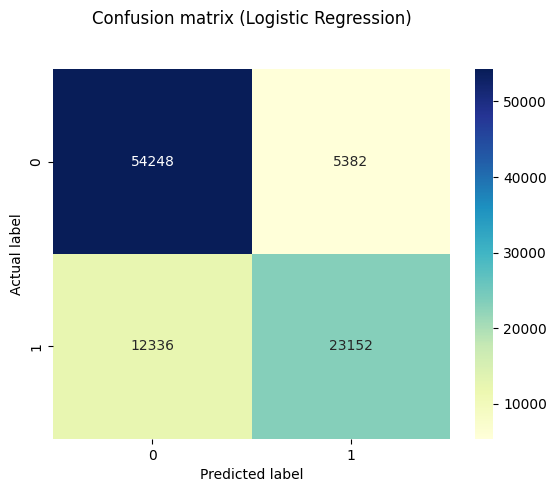

In [76]:
y_pred = (model_log.predict_proba(training_set_X_log)[:, 1] >= log_cutouff).astype(int)

result = pd.DataFrame({'Actual': training_set_y_log, 'Predicted': y_pred})
result.head(20)

confusion_mat = confusion_matrix(training_set_y_log, y_pred)

sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix (Logistic Regression)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
cohen_kappa_score(training_set_y_log, y_pred)
accuracy_score(training_set_y_log, y_pred)

0.8137261086229736

#### Test Set Accuracy

In [78]:
y_pred = (model_log.predict_proba(testing_set_X_log)[:, 1] >= log_cutouff).astype(int)

In [79]:
result = pd.DataFrame({'Actual': testing_set_y_log, 'Predicted': y_pred})
result.head(20)

,Actual,Predicted
111571,0,0
91156,0,0
102675,0,0
8550,0,0
86596,0,0
16786,0,0
102421,0,1
8426,1,0
65835,1,0
109075,0,0


In [80]:
confusion_mat = confusion_matrix(testing_set_y_log, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

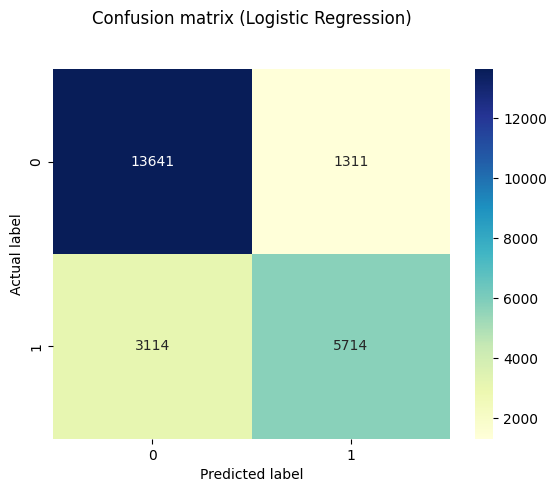

In [81]:
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix (Logistic Regression)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [82]:
cohen_kappa_score(testing_set_y_log, y_pred)
accuracy_score(testing_set_y_log, y_pred)

0.813919259882254

### (5.4.2) K-Nearest Neighbors

##### Set Prediction Threshold

In [56]:
knn_cutouff = 0.5

##### Predict on Test Data

1. Inspect Training Set Accuracy
2. Inspect Test Set Accuracy

#### Training Set Accuracy

Text(0.5, 23.52222222222222, 'Predicted label')

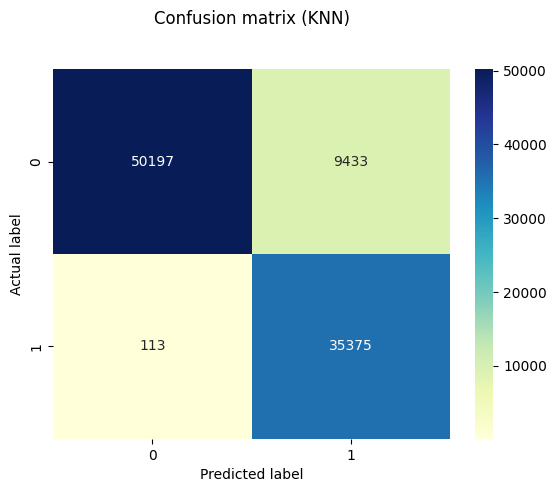

In [83]:
y_pred = (model_knn.predict_proba(training_set_X_knn.values)[:, 1] >= knn_cutouff).astype(int)

result = pd.DataFrame({'Actual': training_set_y_knn.values, 'Predicted': y_pred})
result.head(20)

confusion_mat = confusion_matrix(training_set_y_knn.values, y_pred)

sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix (KNN)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [72]:
cohen_kappa_score(training_set_y_knn, y_pred)
accuracy_score(training_set_y_knn, y_pred)

0.8996404466031666

#### Test Set Accuracy

In [90]:
y_pred = (model_knn.predict_proba(testing_set_X_knn.values)[:, 1] >= knn_cutouff).astype(int)

In [91]:
result = pd.DataFrame({'Actual': testing_set_y_knn, 'Predicted': y_pred})
result.head(20)

,Actual,Predicted
111571,0,0
91156,0,0
102675,0,0
8550,0,0
86596,0,0
16786,0,1
102421,0,1
8426,1,1
65835,1,1
109075,0,0


* Testing Accuracy and Kappa

In [92]:
confusion_mat = confusion_matrix(testing_set_y_knn, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

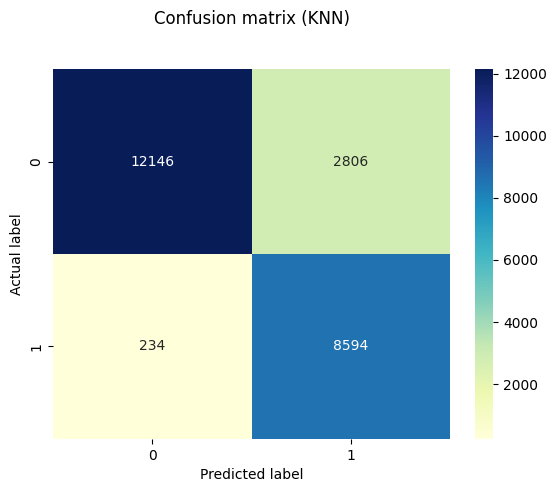

In [93]:
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix (KNN)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
cohen_kappa_score(testing_set_y_knn, y_pred)
accuracy_score(testing_set_y_knn, y_pred)

0.872161480235492

### (5.4.3) Random Forest

##### Set Prediction Threshold

In [50]:
rf_cutouff = 0.5

##### Predict on Test Data

* Training Set Accuracy
* Test Set Accuracy

#### Training Set Accuracy

Text(0.5, 23.52222222222222, 'Predicted label')

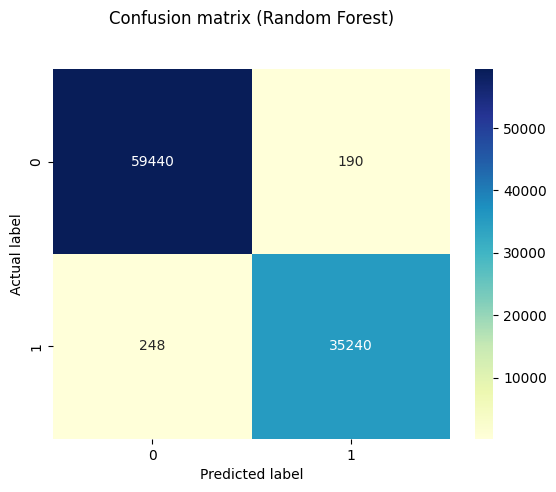

In [64]:
y_pred = (model_rf.predict_proba(training_set_X_rf)[:, 1] >= rf_cutouff).astype(int)

result = pd.DataFrame({'Actual': training_set_y_rf, 'Predicted': y_pred})
result.head(20)

confusion_mat = confusion_matrix(training_set_y_rf, y_pred)

sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix (Random Forest)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
cohen_kappa_score(training_set_y_rf, y_pred)
accuracy_score(training_set_y_rf, y_pred)

0.9953951933388002

#### Testing Set Accuracy

In [51]:
y_pred = (model_rf.predict_proba(testing_set_X_rf)[:, 1] >= rf_cutouff).astype(int)

In [52]:
result = pd.DataFrame({'Actual': testing_set_y_rf, 'Predicted': y_pred})
result.head(20)

,Actual,Predicted
111571,0,0
91156,0,0
102675,0,0
8550,0,0
86596,0,0
16786,0,0
102421,0,0
8426,1,1
65835,1,1
109075,0,0


In [53]:
confusion_mat = confusion_matrix(testing_set_y_rf, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

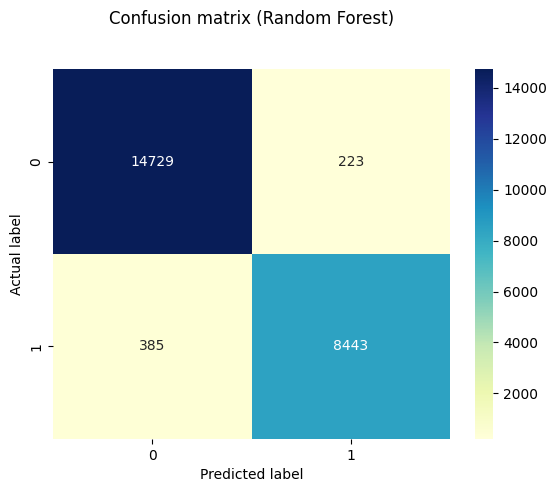

In [54]:
sns.heatmap(pd.DataFrame(confusion_mat), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix (Random Forest)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
cohen_kappa_score(testing_set_y_rf, y_pred)

0.9450257920496736